In [16]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [54]:
pandas_profiling.ProfileReport(pd.DataFrame(iris.data))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

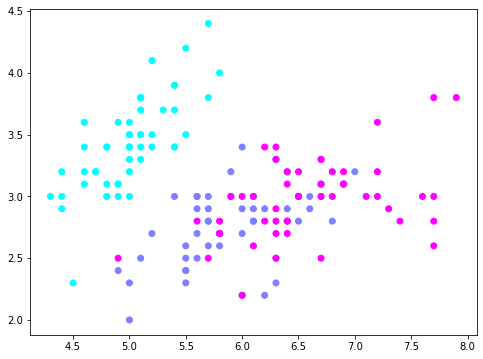

In [40]:
plt.figure(figsize=(8, 6))
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cool")
plt.show()

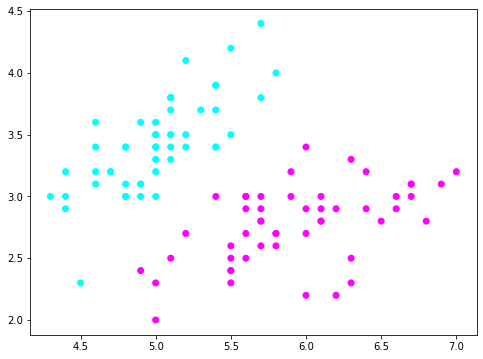

In [41]:
iris = datasets.load_iris()
X = iris.data[:100]
y = iris.target[:100]

plt.figure(figsize=(8, 6))
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cool")
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X[:,0:2], y, test_size=0.4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (60, 2) (60,)
Test set: (40, 2) (40,)


In [44]:
from sklearn import svm
clf = svm.SVC(kernel='linear',class_weight={0:1,1:1} )
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat))

Accuracy:  1.0


In [45]:
clf.class_weight_ #pesos de las clases

array([1., 1.])

In [46]:
clf.classes_ #Obtener las clases

array([0, 1])

In [47]:
clf.support_vectors_ #Los vectores de soporte 

array([[5. , 3. ],
       [5.5, 3.5],
       [4.5, 2.3],
       [5.4, 3.4],
       [5.7, 3.8],
       [4.9, 3.1],
       [4.9, 3. ],
       [5.6, 2.9],
       [5.6, 3. ],
       [5. , 2.3],
       [4.9, 2.4],
       [5.7, 3. ],
       [5.9, 3.2]])

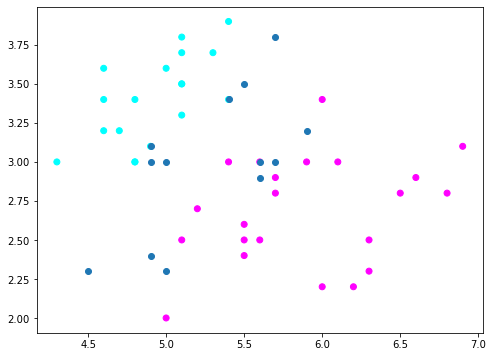

In [51]:
iris = datasets.load_iris()
X = iris.data[:100]
y = iris.target[:100]

plt.figure(figsize=(8, 6))
# Plot the training points
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="rainbow") # Con los que se entreno#
plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 'o') #Vectores de soporte
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="cool") # Con los que hacemos el test 


4.3 7.0 2.0 4.4


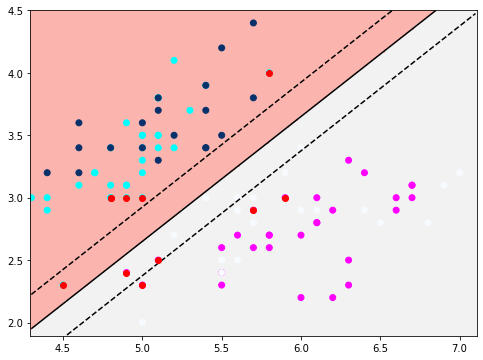

In [27]:
plt.figure(figsize=(8, 6))

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

print(x_min,x_max,y_min,y_max)

XX, YY = np.mgrid[x_min:x_max+0.1:200j, y_min-0.1:y_max+0.1:200j]

Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap="Pastel1",shading='auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="cool")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="Blues_r")
plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 'ro')
plt.show()